# Predicting H1N1 and FLU Vaccines

### Importing Necessary Libraries

In [32]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

ModuleNotFoundError: No module named 'missingno'

In [2]:
df_features = pd.read_csv('data/training_set_features.csv')
df_labels = pd.read_csv('data/training_set_labels.csv')

In [3]:
df_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
df_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [5]:
df_features.shape

(26707, 36)

In [6]:
df_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
df_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [8]:
df_labels.shape

(26707, 3)

In [9]:
df = df_features.set_index('respondent_id').join(df_labels.set_index('respondent_id'))
print(df.shape)
df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [10]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [11]:
'''
'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'education', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'
    
'''

"\n'behavioral_antiviral_meds', 'behavioral_avoidance',\n       'behavioral_face_mask', 'behavioral_wash_hands',\n       'behavioral_large_gatherings', 'behavioral_outside_home',\n       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',\n       'chronic_med_condition', 'child_under_6_months', 'health_worker',\n       'health_insurance', 'education', 'income_poverty', 'marital_status',\n       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',\n       'household_adults', 'household_children', 'employment_industry',\n       'employment_occupation'\n    \n"

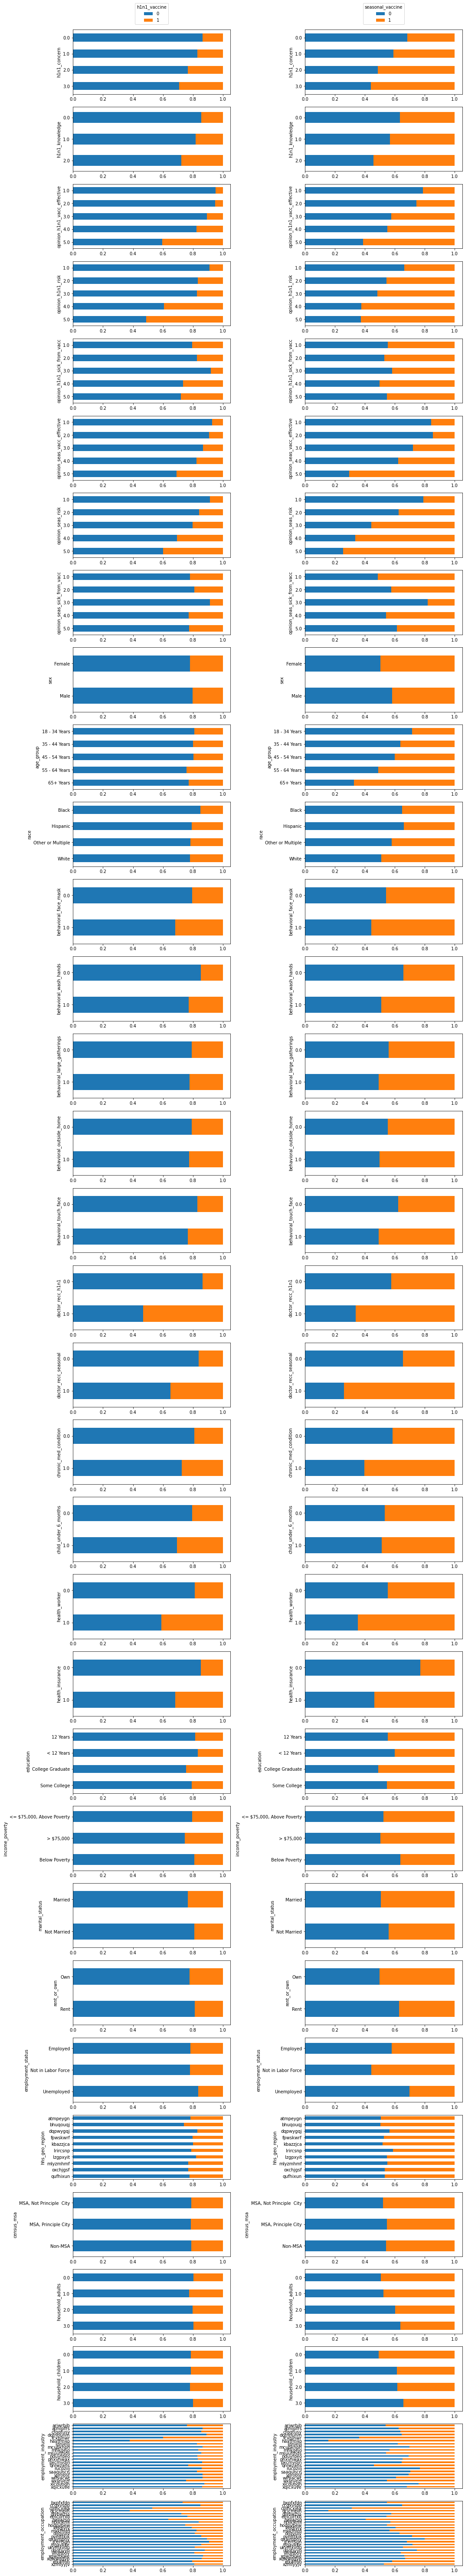

In [12]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'behavioral_face_mask', 
    'behavioral_wash_hands',
    'behavioral_large_gatherings', 
    'behavioral_outside_home',
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal',
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker',
    'health_insurance', 
    'education', 
    'income_poverty', 
    'marital_status',
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa',
    'household_adults', 
    'household_children', 
    'employment_industry',
    'employment_occupation'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(15,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [13]:
df.dtypes


h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [14]:
df_2 = df.drop(columns =['hhs_geo_region', 
                   'employment_industry', 
                   'employment_occupation', 
                   'household_adults',
                   'household_children',
                   'household_children',
                   'employment_status', 
                   'income_poverty',
                   'race', 
                   'opinion_seas_sick_from_vacc', 
                   'opinion_h1n1_sick_from_vacc',
                   'behavioral_outside_home',
                   'behavioral_large_gatherings',
                   'behavioral_avoidance',
                   'behavioral_antiviral_meds',
                    'census_msa'])
                   
               

In [15]:
df_2

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,...,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,marital_status,rent_or_own,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,55 - 64 Years,< 12 Years,Female,Not Married,Own,0,0
1,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,2.0,35 - 44 Years,12 Years,Male,Not Married,Rent,0,1
2,1.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,...,1.0,4.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Own,0,0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,4.0,65+ Years,12 Years,Female,Not Married,Rent,0,1
4,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,45 - 54 Years,Some College,Female,Married,Own,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,2.0,65+ Years,Some College,Female,Not Married,Own,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,5.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Rent,0,0
26704,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,55 - 64 Years,Some College,Female,Not Married,Own,0,1


In [16]:
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Own", value = 0)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Rent", value = 1)


In [17]:
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Not Married", value = 0)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Married", value = 1)


In [18]:
df_2['sex'] = df_2['sex'].replace(to_replace = "Female", value = 0)
df_2['sex'] = df_2['sex'].replace(to_replace = "Male", value = 1)


In [19]:
df_2['education'] = df_2['education'].replace(to_replace = "< 12 Years", value = 0)
df_2['education'] = df_2['education'].replace(to_replace = "12 Years", value = 1)
df_2['education'] = df_2['education'].replace(to_replace = "Some College", value = 2)
df_2['education'] = df_2['education'].replace(to_replace = "College Graduate", value = 3)


In [20]:
df_2['age_group'] = df_2['age_group'].replace(to_replace = "18 - 34 Years", value = 0)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "35 - 44 Years", value = 1)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "45 - 54 Years", value = 2)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "55 - 64 Years", value = 3)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "65+ Years", value = 4)

In [21]:
df_2.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_seas_vacc_effective      462
opinion_seas_risk                514
age_group                          0
education                       1407
sex                                0
marital_status                  1408
rent_or_own                     2042
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

In [22]:
# df_2 = SimpleImputer(missing_values=np.nan, strategy='median')
# pd.DataFrame(imp.fit_transform(df_2)

In [26]:
X = df_2.drop("h1n1_vaccine", axis=1)
y = df_2["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [30]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_log_loss = -cross_val_score(tree_model, X_train, y_train, scoring="neg_log_loss")

tree_log_loss

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    r

array([nan, nan, nan, nan, nan])

In [24]:
df.isnull().any()

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            False
income_poverty                  True
marital_status                  True
r